## Packages

### Install

In [176]:
pip install numpy

In [177]:
pip install pandas

In [178]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [179]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [180]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [181]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [182]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [183]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [184]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [185]:
pip install -U statsmodels

Note: you may need to restart the kernel to use updated packages.


In [186]:
pip install Jinja2

In [187]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [188]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


### Import

In [189]:
import numpy as np # for scientific computing
import pandas as pd # a fundamental and powerful package for data analysis and manipulation
import seaborn as sns # seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import pyreadstat # for reading .sav file
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, LeaveOneOut, train_test_split # for separating train and test data, scaling, model building, ...
from scipy import stats # it contains a large number of statistics, probability distributions functions
import matplotlib.pyplot as plt # matplotlib is a library to plot graphs in Python
from matplotlib.pyplot import figure # Plot graph
from sklearn.impute import KNNImputer # Imputation for completing missing values using k-Nearest Neighbors
from sklearn.experimental import enable_iterative_imputer # Enables IterativeImputer. The API and results of this estimator might change without any deprecation cycle
from sklearn.impute import IterativeImputer # Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion
from sklearn.ensemble import RandomForestClassifier # A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
from xgboost import XGBClassifier # A boosting algorithm based on gradient boosted decision trees algorithm
from boruta import BorutaPy # Boruta is an all relevant feature selection method, while most other are minimal optimal; this means it tries to find all features carrying information usable for prediction, rather than finding a possibly compact subset of features on which some classifier has a minimal error
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler# Implementation of SMOTE - Synthetic Minority Over-sampling Technique , ADASYN, ROSE
from imblearn.combine import SMOTEENN # Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours
from collections import Counter # A Counter is a container that keeps track of how many times equivalent values are added
from sklearn.metrics import plot_confusion_matrix # plot confusion matrix
from sklearn.metrics import accuracy_score # Accuracy classification score
from sklearn.model_selection import cross_val_score # Evaluate a score by cross-validation
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics
from sklearn import preprocessing # provides the StandardScaler utility class, which is a quick and easy way to perform operations
from sklearn.preprocessing import StandardScaler # To normalize the data for KNNImputer
from sklearn.manifold import TSNE # To visualize high dimensional data
from sklearn.decomposition import PCA # PCA Analysis
from sklearn.pipeline import Pipeline # Pipeline to connect scalers and classifiers
from sklearn.metrics import roc_curve, roc_auc_score #Evaluate ROC curve
import requests # Requests will allow you to send HTTP/1.1 requests using Python
from sklearn.model_selection import RandomizedSearchCV # Randomized search on hyper parameters

## 1. Read Data

In [190]:
# Download the SAV file, reading data as a data frame, setting ID as the index and getting the number of rows and columns
url = 'https://www.dropbox.com/s/g0ih98fpsmpn7cm/secom_mod.SAV?dl=1'
r = requests.get(url, allow_redirects=True)
open('secom_mod.SAV', 'wb').write(r.content)
df = pd.DataFrame(pd.read_spss("secom_mod.SAV"))
df = df.set_index('ID')
df.shape

(1567, 592)

## 2. Explore data

### 2.1. Shape and type

In [191]:
# shape of the data set
print('Shape: ',df.shape)  

Shape:  (1567, 592)


In [192]:
# checking data types of the features
print(df.info(),"\n")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1567 entries, 1.0 to 1567.0
Columns: 592 entries, class to feature590
dtypes: float64(591), object(1)
memory usage: 7.1+ MB
None 

class         float64
timestamp      object
feature001    float64
feature002    float64
feature003    float64
               ...   
feature586    float64
feature587    float64
feature588    float64
feature589    float64
feature590    float64
Length: 592, dtype: object


In [193]:
# Check for duplicated rows
df.duplicated().any()

False

In [194]:
#Check for duplicated columns
listofName = list(df.columns)
testID = df[[c for c in df if c not in listofName]]
#its runnig for the whole DF
testRows = df[df.duplicated()]
testRows.head()

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,


### 2.3. Pass / Fail ratio

In [195]:
# number of pass and fail values
df['class'].value_counts()

0.0    1472
1.0      95
Name: class, dtype: int64

In [196]:
# pie chart of the target variable
def ClassDistributionGraph(df, title):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    
    labels = ['Pass', 'Fail']
    distribution = df.value_counts()
    colors = ['lightblue', 'yellowgreen']

    # Plot
    plt.pie(distribution, labels=labels, colors=colors, autopct= lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*distribution.sum()), shadow=True, startangle=140,)
    plt.title(title, fontsize=15)
    plt.axis('equal')
    plt.show()

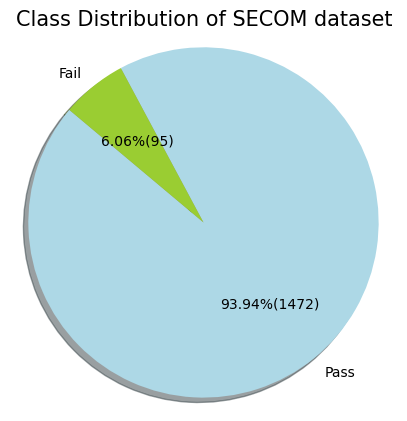

In [197]:
ClassDistributionGraph(df['class'], 'Class Distribution of SECOM dataset')

### 2.4. Histogram of features

23 9 8 3


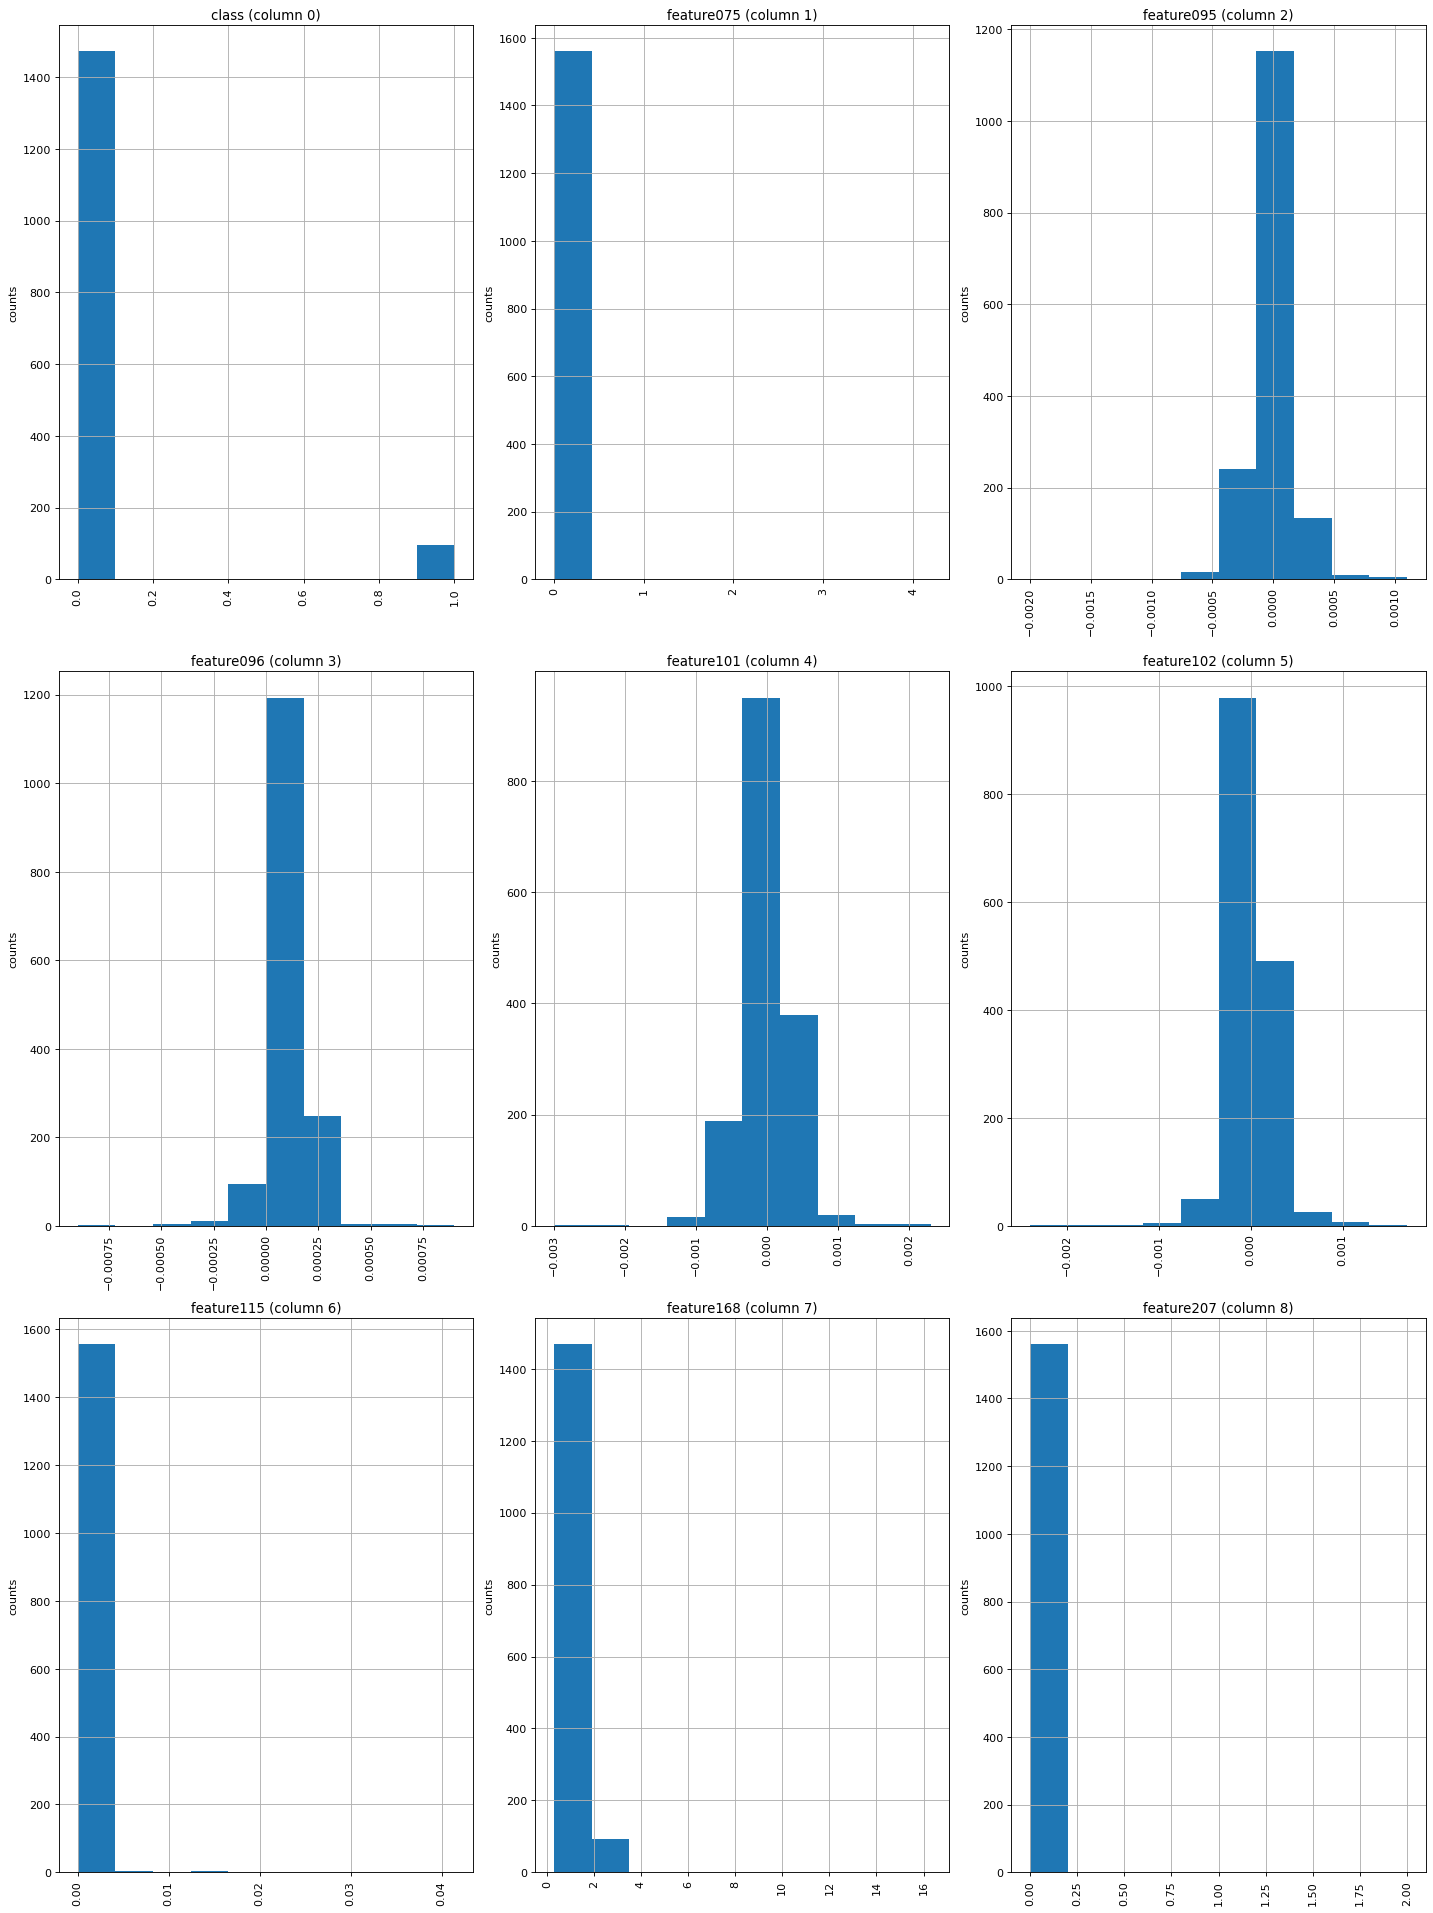

In [198]:
# histogram of some of the features
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})
 
    
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    %matplotlib inline
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
   
    print(nCol, nGraphShown, nGraphRow, nGraphPerRow)
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df, 9, 3)

### 2.5. Correlation

In [199]:
# Correlation Histogram

def correlation(df):
    cor_matrix = pd.DataFrame(df.corr())

    # Remove reuntant values by selecting only the upper correlation triangle
    upper_tri = pd.DataFrame(cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool)))

    # Convert the upper correlation triangle to a Series
    corlist = pd.Series(upper_tri.values.ravel('F'))

    # Correlation Histogram
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    # Plot Histogram on x
    plt.hist(corlist, bins =50)
    plt.gca().set(title='Frequency Histogram of Correlation', ylabel='Frequency', xlabel='Correlation coefficient');

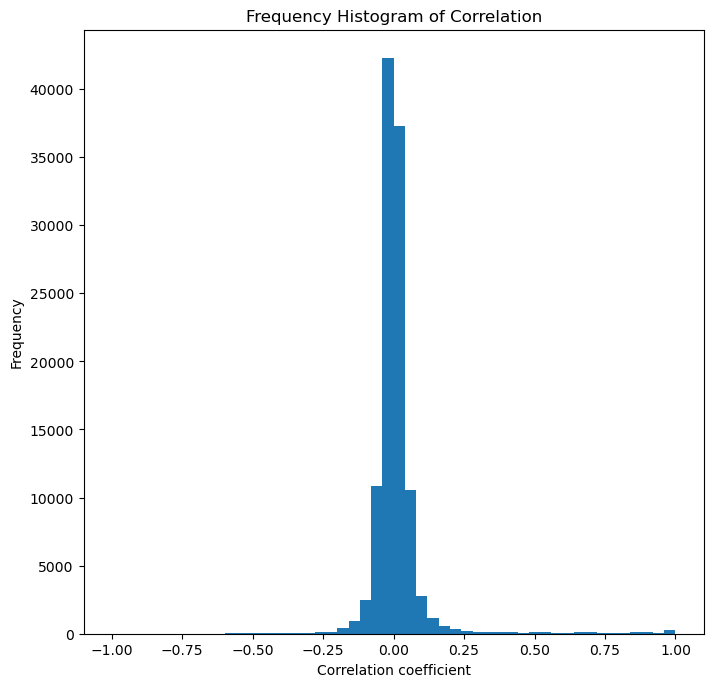

In [200]:
correlation(df)

### 2.6. Missing values

In [201]:
# Total number of Nan values in the dataframe
df.isna().sum().sum()

41951

In [202]:
#number of cols with Nan values
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print('number of columns with missing values = ', len(nan_cols))

#number of rows with Nan values
nan_rows = df.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows
print('number of rows with missing values = ', len(nan_rows))

number of columns with missing values =  538
number of rows with missing values =  1567


## 3. Preprocessing

In [203]:
# Give text labels to the training examples
df['class'] = df['class'].replace({0: "PASS", 1: "FAIL"})
df.tail()

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
1563.0,PASS,16/10/2008 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1564.0,PASS,16/10/2008 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1565.0,PASS,17/10/2008 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1566.0,PASS,17/10/2008 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941
1567.0,PASS,17/10/2008 06:07:00,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,...,0.0045,137.7844,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844


## 4. Data Preparation

### 4.1 Splitting Traninig and Test Data

In [204]:
# Split df into X and y
y = df['class']
X = df.drop('class', axis=1)

In [205]:
# Train-test split
X_train, X_test , y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle=True, random_state=40, stratify=y)

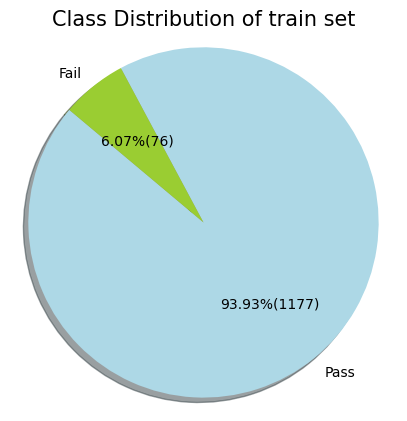

In [206]:
# pie chart for the train set
ClassDistributionGraph(y_train, 'Class Distribution of train set')

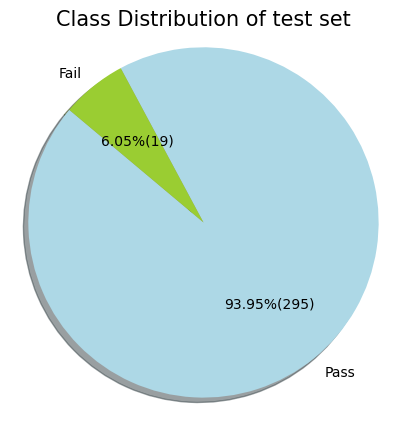

In [207]:
# pie chart for the test set
ClassDistributionGraph(y_test, 'Class Distribution of test set')

### 4.2 Rough feature reduction

#### 4.2.1 Removal of timestamp

In [208]:
# removing timestamp
X_train= X_train.drop(columns='timestamp')

#### 4.2.2 Removal of constants

In [209]:
#columns that have the same value excluding nan
print(len(X_train.columns[X_train.nunique() == 1]))

#column names with same value in it
X_train.columns[X_train.nunique() == 1]
print(list(X_train.columns[X_train.nunique() == 1]))

#remove these columns since it adds no value
single_value_columns = list(X_train.columns[X_train.nunique() == 1])
X_train=X_train.drop(columns=single_value_columns)
X_train

116
['feature006', 'feature014', 'feature043', 'feature050', 'feature053', 'feature070', 'feature098', 'feature142', 'feature150', 'feature179', 'feature180', 'feature187', 'feature190', 'feature191', 'feature192', 'feature193', 'feature194', 'feature195', 'feature227', 'feature230', 'feature231', 'feature232', 'feature233', 'feature234', 'feature235', 'feature236', 'feature237', 'feature238', 'feature241', 'feature242', 'feature243', 'feature244', 'feature257', 'feature258', 'feature259', 'feature260', 'feature261', 'feature262', 'feature263', 'feature264', 'feature265', 'feature266', 'feature267', 'feature277', 'feature285', 'feature314', 'feature315', 'feature316', 'feature323', 'feature326', 'feature327', 'feature328', 'feature329', 'feature330', 'feature331', 'feature365', 'feature370', 'feature371', 'feature372', 'feature373', 'feature374', 'feature375', 'feature376', 'feature379', 'feature380', 'feature381', 'feature382', 'feature395', 'feature396', 'feature397', 'feature398', '

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
567.0,3023.07,2484.55,2242.8555,1430.7270,0.8832,106.2100,0.1216,1.5613,-0.0028,0.0008,...,NaN,NaN,0.4979,0.0165,0.0041,3.3098,0.0184,0.0127,0.0037,68.7057
1261.0,2953.63,2384.04,2191.2111,1437.5003,2.2073,97.6444,0.1235,1.3584,-0.0024,-0.0048,...,NaN,NaN,0.4968,0.0188,0.0041,3.7853,0.0137,0.0326,0.0108,237.4625
1041.0,3021.61,2440.29,2227.2222,2043.5876,1.1892,95.5267,0.1253,1.5335,-0.0083,-0.0095,...,NaN,NaN,0.5091,0.0123,0.0031,2.4116,0.0437,0.0200,0.0074,45.7019
1181.0,3093.46,2479.17,2221.3667,2490.6947,1.2667,88.6578,0.1220,1.3537,0.0134,-0.0039,...,NaN,NaN,0.5006,0.0148,0.0036,2.9659,0.0190,0.0150,0.0045,78.6525
611.0,3010.40,NaN,2172.4000,1148.4101,1.2614,102.4522,0.1227,1.3843,-0.0010,-0.0004,...,NaN,NaN,0.5015,0.0137,0.0034,2.7339,0.0252,0.0157,0.0046,62.3881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806.0,2952.31,2453.53,2188.7222,1325.5230,1.1721,105.1700,0.1250,1.4480,-0.0233,0.0087,...,NaN,NaN,0.4949,0.0155,0.0034,3.1238,0.0253,0.0058,0.0018,22.7661
1101.0,2880.58,2489.76,2256.6000,2365.4787,1.1384,85.4278,0.1205,1.6114,0.0484,0.0043,...,0.0076,50.7949,0.5032,0.0117,0.0029,2.3282,0.0398,0.0202,0.0076,50.7949
1469.0,2968.78,2451.53,2207.1000,1298.4309,1.0251,96.9478,0.1203,1.3985,-0.0105,-0.0140,...,0.0084,185.3578,0.4972,0.0133,0.0036,2.6718,0.0167,0.0310,0.0084,185.3578


#### 4.2.3 Checking for columns more than a percentage of nan values

In [210]:
# count the number of missing values for each column
num_missing = pd.DataFrame((X_train.isna()).sum())
print(num_missing.sort_values(0))

               0
feature360     0
feature223     0
feature224     0
feature249     0
feature250     0
...          ...
feature359  1078
feature294  1140
feature158  1140
feature159  1140
feature293  1140

[474 rows x 1 columns]


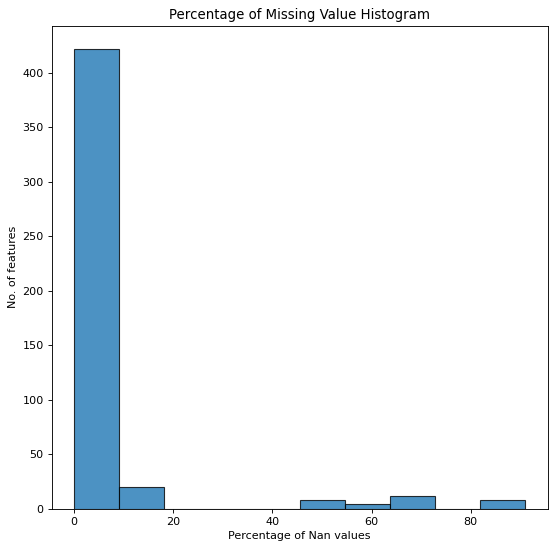

In [211]:
# Missing Value histogram
nan_perc = pd.DataFrame(round((X_train.isnull().sum() * 100/ len(X_train)),2))
nan_perc = nan_perc.reset_index()
nan_perc = nan_perc.rename({'index': 'feature', 0: 'percentage'}, axis=1)

%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':80})
n,bins,patch = plt.hist(nan_perc['percentage'],bins=10, alpha=0.8, label='Value', edgecolor='black', linewidth=1)
plt.gca().set(title='Percentage of Missing Value Histogram', ylabel='No. of features', xlabel='Percentage of Nan values')
plt.show()

In [212]:
# Defining a threshold to remove the values above it
threshold= 1
pct_null = X_train.isnull().sum() / len(X_train)
missing_value_cols = pct_null[pct_null >= threshold].index

# number of features containing more than the threshold of missing values
print(len(missing_value_cols))
print(missing_value_cols)

X_train = X_train.drop(missing_value_cols, axis=1)

0
Index([], dtype='object')


#### 4.2.4 Less volatile

In [213]:
# Exploring remaining features
summary = X_train.iloc[:,:].describe(include='all')

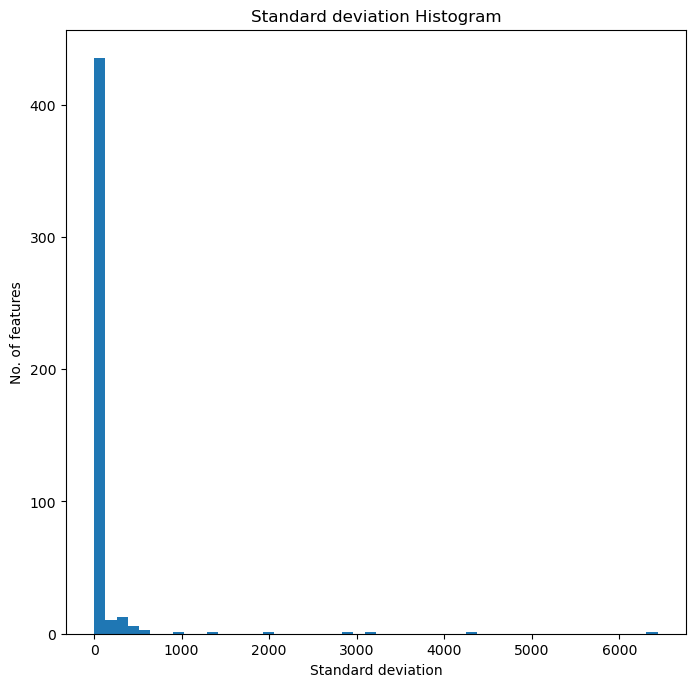

In [214]:
# Checking std of remaining features

def StandardDeviation(df):
    import matplotlib.pyplot as plt

    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    plt.hist(df.std(), bins = 50)
    plt.gca().set(title='Standard deviation Histogram', ylabel='No. of features', xlabel='Standard deviation');
    plt.show()
    
StandardDeviation(X_train)

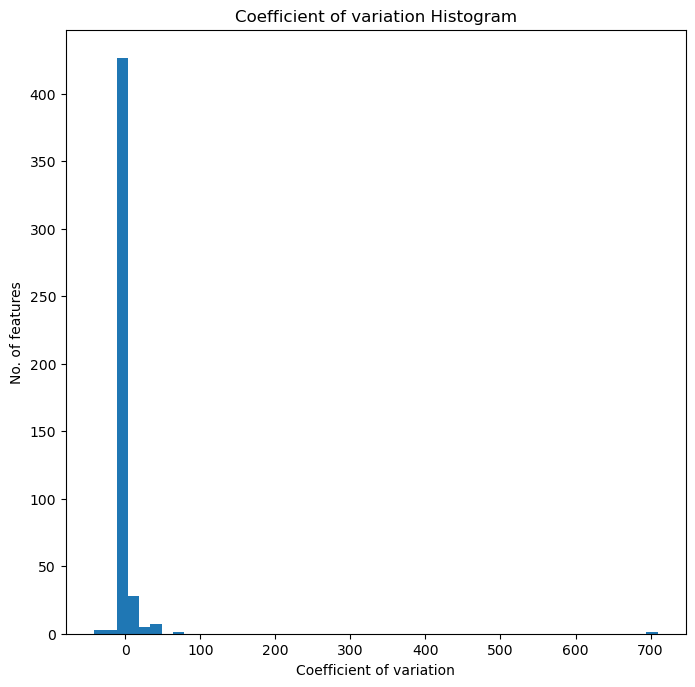

In [215]:
# Checking coeff std of remaining features
def CoefficientOfVariation(df):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    plt.hist(df.std()/df.mean(), bins = 50)
    plt.gca().set(title='Coefficient of variation Histogram', ylabel='No. of features', xlabel='Coefficient of variation');
    plt.show()

CoefficientOfVariation(X_train)

<AxesSubplot:>

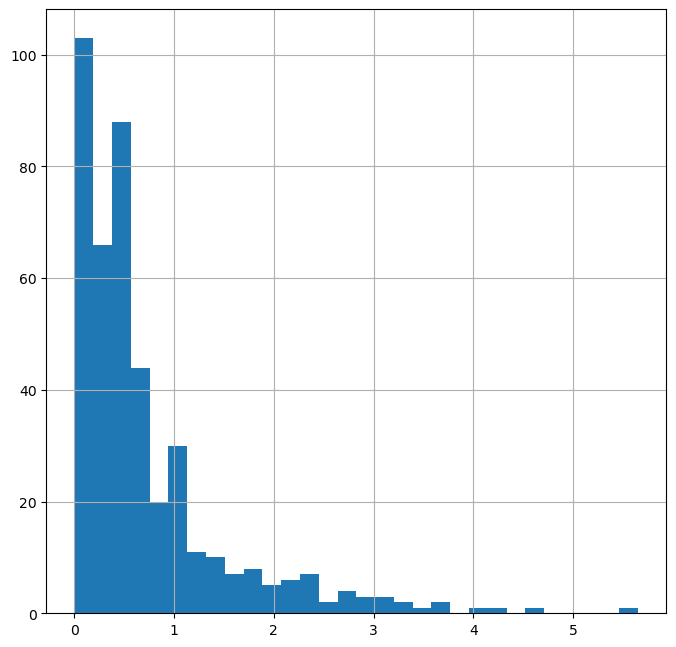

In [216]:
# histogram of the coefficient standard deviation of a percentage of features with the least coeffstd
feature_coeffstd = pd.DataFrame(summary.loc['std',:]/abs(summary.loc['mean',:])).sort_values(by=[0])
percentage_features = int(len(feature_coeffstd)*90/100)
feature_coeffstd.iloc[0:percentage_features,0].hist(bins=30)

In [217]:
# a percentage of features with the least coeffstd to remove
percentageToAnalyze = 0

percentage_features_rm = int(len(feature_coeffstd)*percentageToAnalyze/100)
feature_index = feature_coeffstd.index
features_least_volatile = feature_index[0:percentage_features_rm]
print("Number of least Volatiles", len(features_least_volatile))
print(features_least_volatile)

Number of least Volatiles 0
Index([], dtype='object')


In [218]:
# dropping a percentage of features with the least coeffstd
X_train.drop(features_least_volatile, axis = 1, inplace = True)

In [219]:
X_train

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
567.0,3023.07,2484.55,2242.8555,1430.7270,0.8832,106.2100,0.1216,1.5613,-0.0028,0.0008,...,NaN,NaN,0.4979,0.0165,0.0041,3.3098,0.0184,0.0127,0.0037,68.7057
1261.0,2953.63,2384.04,2191.2111,1437.5003,2.2073,97.6444,0.1235,1.3584,-0.0024,-0.0048,...,NaN,NaN,0.4968,0.0188,0.0041,3.7853,0.0137,0.0326,0.0108,237.4625
1041.0,3021.61,2440.29,2227.2222,2043.5876,1.1892,95.5267,0.1253,1.5335,-0.0083,-0.0095,...,NaN,NaN,0.5091,0.0123,0.0031,2.4116,0.0437,0.0200,0.0074,45.7019
1181.0,3093.46,2479.17,2221.3667,2490.6947,1.2667,88.6578,0.1220,1.3537,0.0134,-0.0039,...,NaN,NaN,0.5006,0.0148,0.0036,2.9659,0.0190,0.0150,0.0045,78.6525
611.0,3010.40,NaN,2172.4000,1148.4101,1.2614,102.4522,0.1227,1.3843,-0.0010,-0.0004,...,NaN,NaN,0.5015,0.0137,0.0034,2.7339,0.0252,0.0157,0.0046,62.3881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806.0,2952.31,2453.53,2188.7222,1325.5230,1.1721,105.1700,0.1250,1.4480,-0.0233,0.0087,...,NaN,NaN,0.4949,0.0155,0.0034,3.1238,0.0253,0.0058,0.0018,22.7661
1101.0,2880.58,2489.76,2256.6000,2365.4787,1.1384,85.4278,0.1205,1.6114,0.0484,0.0043,...,0.0076,50.7949,0.5032,0.0117,0.0029,2.3282,0.0398,0.0202,0.0076,50.7949
1469.0,2968.78,2451.53,2207.1000,1298.4309,1.0251,96.9478,0.1203,1.3985,-0.0105,-0.0140,...,0.0084,185.3578,0.4972,0.0133,0.0036,2.6718,0.0167,0.0310,0.0084,185.3578


### 4.3 Outlier Identification

In [220]:
# Funtion for Outlier treatment
def Outlier(X, outlier_treatment) :
    
    if outlier_treatment == 'NaN' :
        # calculating the z score of the values
        z_train= pd.DataFrame(stats.zscore(X,nan_policy='omit'))
        z_train

        # calculating the number of outliers
        print('Number of Outliers : ',sum(z_train.apply(lambda x: sum(x.apply(lambda x: 1 if abs(x)>3 else 0)))))

        #Outlier treatment : replacing outliers with NA to impute all NA values
        is_outlier = abs(z_train)>3
        is_outlier.columns = X.columns
        is_outlier.index = X.index
        return(X.mask(is_outlier, np.nan))
    
    elif outlier_treatment == '3s':
        boundary = 3
        scaler = preprocessing.StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)
        X = X.apply(lambda x : [y if y < boundary or np.isnan(y) else boundary for y in x])
        X = X.apply(lambda x : [y if y > -1*boundary or np.isnan(y) else -1*boundary for y in x])
        
        # for inverse transformation
        X_inverse = pd.DataFrame(scaler.inverse_transform(X))
        X_inverse.columns = X.columns
        return(X_inverse)




In [221]:
# Outlier treatment with NA values
X_train = Outlier(X_train, 'NaN')

Number of Outliers :  4993


In [222]:
# Outlier treatment with 3s values
#X_train = Outlier(X_train, '3s')

### 4.4 Missing value Imputation

#### 4.4.1 Define function for imputation

In [223]:
# function for imputing missing values
def MissingValueImputation(X, Imputer) :
    
    if Imputer == 'KNN' :
        
        #Scaling
        scaler = preprocessing.StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
        
        #define imputer
        KNN_imputer = KNNImputer(n_neighbors=10, weights = 'uniform')

        #fit on the dataset
        X = KNN_imputer.fit_transform(X)
        
        #Inverse tranform of scaling
        X_inverse = pd.DataFrame(scaler.inverse_transform(X))
        return(X_inverse)
        
    elif Imputer == 'MICE' :
        
        #define imputer
        MICE_imputer = IterativeImputer(max_iter=2, sample_posterior=False, random_state=40)
        
        #fit dataset
        return(MICE_imputer.fit_transform(X))

#### 4.4.2 KNN

In [224]:
# impute using knn
X_train_KNN = X_train.copy(deep=True)
X_train_KNN.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_train,'KNN'))

In [225]:
X_train_KNN.isna().sum().sum()

0

#### 4.4.3 MICE

In [226]:
# impute using mice
X_train_MICE = X_train.copy(deep=True)
X_train_MICE.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_train,'MICE'))

C:\Users\Behzad\anaconda3\envs\BP1\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [227]:
X_train_MICE.to_csv('X_train_MICE.CSV')
#X_train_MICE = pd.DataFrame(pd.read_csv("X_train_MICE.CSV"))
#X_train_MICE = X_train_MICE.set_index('ID')

In [228]:
X_train_MICE.isna().sum().sum()

0

#### 4.4.4 Evaluation of imputation

Text(0.5, 0, 'feature570')

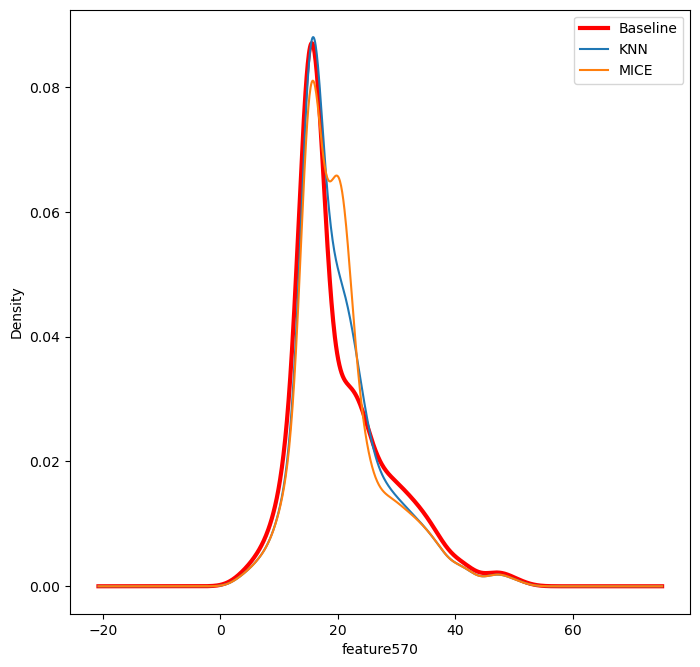

In [229]:
# Visualization of a variable with most missing values and less than 40% of missing values

X_train['feature570'].plot(kind='kde',c='red',linewidth=3)
X_train_KNN['feature570'].plot(kind='kde')
X_train_MICE['feature570'].plot(kind='kde')
labels = ['Baseline', 'KNN','MICE']
plt.legend(labels)
plt.xlabel('feature570')

86


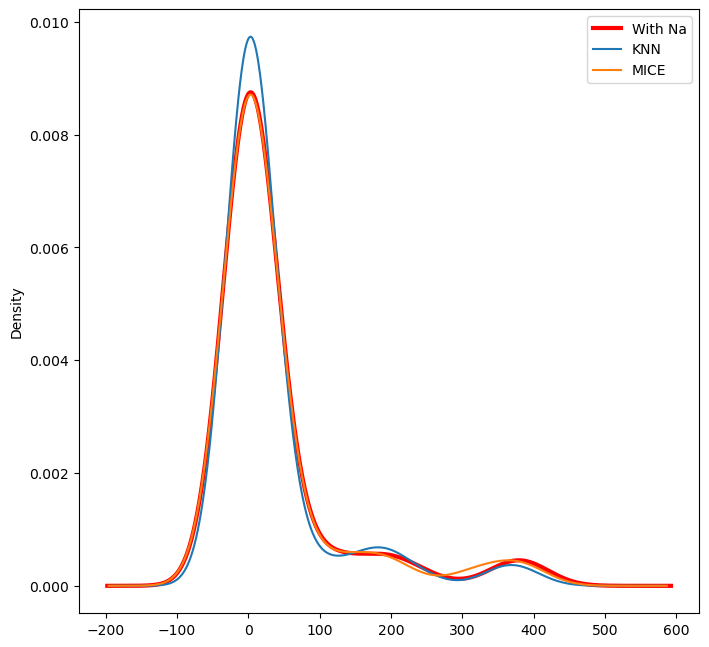

In [230]:
# plot the std of the features with more than 3% of missing values before and after imputation with knn and mice
feature_missing_sum = pd.DataFrame((X_train.isna()).sum())
percentage_missing_filter = 3/100
feature_filter = feature_missing_sum[feature_missing_sum[0]>=(len(X_train.loc[:,])*percentage_missing_filter)].index

print(len(feature_filter))

summary_with_na = X_train[feature_filter].describe(include='all')
feature_std_with_na = pd.DataFrame(summary_with_na.loc['std',:])
feature_std_sort_with_na = feature_std_with_na.sort_values(by=['std'])

summary_knn = X_train_KNN[feature_filter].describe(include='all')
feature_std_knn = pd.DataFrame(summary_knn.loc['std',:])
feature_std_sort_knn = feature_std_knn.sort_values(by=['std'])

summary_mice = X_train_MICE[feature_filter].describe(include='all')
feature_std_mice = pd.DataFrame(summary_mice.loc['std',:])
feature_std_sort_mice = feature_std_mice.sort_values(by=['std'])

feature_std_sort_with_na.iloc[:,0].plot(kind='kde',c='red',linewidth=3)
feature_std_sort_knn.iloc[:,0].plot(kind='kde')
feature_std_sort_mice.iloc[:,0].plot(kind='kde')
labels = ['With Na', 'KNN','MICE']
plt.legend(labels)

### 4.5 Feature Selection

#### 4.5.1 Boruta

In [231]:
#Boruta function

def BorutaFeatureSelection (X, y) :
    feature_names = np.array(X.columns)

    # define random forest classifier
    model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
    model.fit(X, y)
    
    # define Boruta feature selection method
    feature_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=40, max_iter=10)

    # find all relevant features
    feature_selector.fit(X.to_numpy(),y)

    # check selected features
    feature_selector.support_

    # check ranking of features
    feature_selector.ranking_

    # zip feature names, ranks, and decisions 
    feature_ranks = list(zip(feature_names, 
                             feature_selector.ranking_, 
                             feature_selector.support_))

    # print the results
    for feat in feature_ranks:
        print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
        
    final_features = list()
    indexes = np.where(feature_selector.support_ == True)
    for x in np.nditer(indexes):
        final_features.append(feature_names[x])
    print(final_features)
    
    
    # call transform() on X to filter it down to selected features
    return pd.DataFrame(X.filter(final_features)) , final_features


In [232]:
# apply Boruta and store selected features in the variable
X_train_MICE_B , final_features_MICE = BorutaFeatureSelection(X_train_MICE,y_train)

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	474
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	474
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	474
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	474
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	474
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	474
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	474
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	0
Tentative: 	40
Rejected: 	434
Iteration: 	9 / 10
Confirmed: 	6
Tentative: 	34
Rejected: 	434


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	6
Tentative: 	16
Rejected: 	434
Feature: feature001                     Rank: 17,  Keep: False
Feature: feature002                     Rank: 364,  Keep: False
Feature: feature003                     Rank: 308,  Keep: False
Feature: feature004                     Rank: 401,  Keep: False
Feature: feature005                     Rank: 200,  Keep: False
Feature: feature007        

In [233]:
X_train_KNN_B , final_features_KNN = BorutaFeatureSelection(X_train_KNN,y_train)

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	474
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	474
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	474
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	474
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	474
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	474
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	474
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	0
Tentative: 	37
Rejected: 	437
Iteration: 	9 / 10
Confirmed: 	0
Tentative: 	37
Rejected: 	437


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	0
Tentative: 	9
Rejected: 	437
Feature: feature001                     Rank: 20,  Keep: False
Feature: feature002                     Rank: 404,  Keep: False
Feature: feature003                     Rank: 347,  Keep: False
Feature: feature004                     Rank: 276,  Keep: False
Feature: feature005                     Rank: 267,  Keep: False
Feature: feature007         

ValueError: Iteration of zero-sized operands is not enabled

In [ ]:
X_train_KNN_B.to_csv('X_train_KNN_B.CSV')
pd.DataFrame(final_features_KNN).to_csv('final_features_KNN.CSV')
#X_train_KNN_B = pd.DataFrame(pd.read_csv("X_train_KNN_B.CSV"))
#X_train_KNN_B = X_train_KNN_B.set_index('ID')
#final_features_KNN = pd.DataFrame(pd.read_csv("final_features_KNN.CSV")).loc[:,'0'].values

In [236]:
X_train_MICE_B.to_csv('X_train_MICE_B.CSV')
pd.DataFrame(final_features_MICE).to_csv('final_features_MICE.CSV')
#X_train_MICE_B = pd.DataFrame(pd.read_csv("X_train_MICE_B.CSV"))
#X_train_MICE_B = X_train_MICE_B.set_index('ID')
#final_features_MICE = pd.DataFrame(pd.read_csv("final_features_MICE.CSV")).loc[:,'0'].values

In [239]:
X_train = X_train_MICE_B.copy(deep=True)
final_features = final_features_MICE.copy()

#### 4.5.2 Overview of remaining features


In [240]:
# Descriptive statistics
X_train.describe()

,feature060,feature104,feature247,feature461,feature518,feature519
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,2.739409,-0.009806,3.691417,29.054949,1.540893,1.598383
std,8.156432,0.002825,0.780884,12.245444,0.668954,0.330232
min,-21.205500,-0.018500,-1.032420,7.953400,0.288000,0.467400
25%,-1.890000,-0.011800,3.652681,20.363900,1.500269,1.586364
50%,0.853600,-0.010100,3.688702,26.336600,1.533159,1.595349
75%,4.361800,-0.008100,3.758855,35.748700,1.548388,1.627777
max,29.750900,-0.000700,10.463200,89.966069,9.317300,4.517100


In [241]:
#datatype and shape
print(X_train.info())
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1253 entries, 567.0 to 645.0
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature060  1253 non-null   float64
 1   feature104  1253 non-null   float64
 2   feature247  1253 non-null   float64
 3   feature461  1253 non-null   float64
 4   feature518  1253 non-null   float64
 5   feature519  1253 non-null   float64
dtypes: float64(6)
memory usage: 68.5 KB
None
(1253, 6)


array([[<AxesSubplot:title={'center':'feature060'}>,
        <AxesSubplot:title={'center':'feature104'}>],
       [<AxesSubplot:title={'center':'feature247'}>,
        <AxesSubplot:title={'center':'feature461'}>],
       [<AxesSubplot:title={'center':'feature518'}>,
        <AxesSubplot:title={'center':'feature519'}>]], dtype=object)

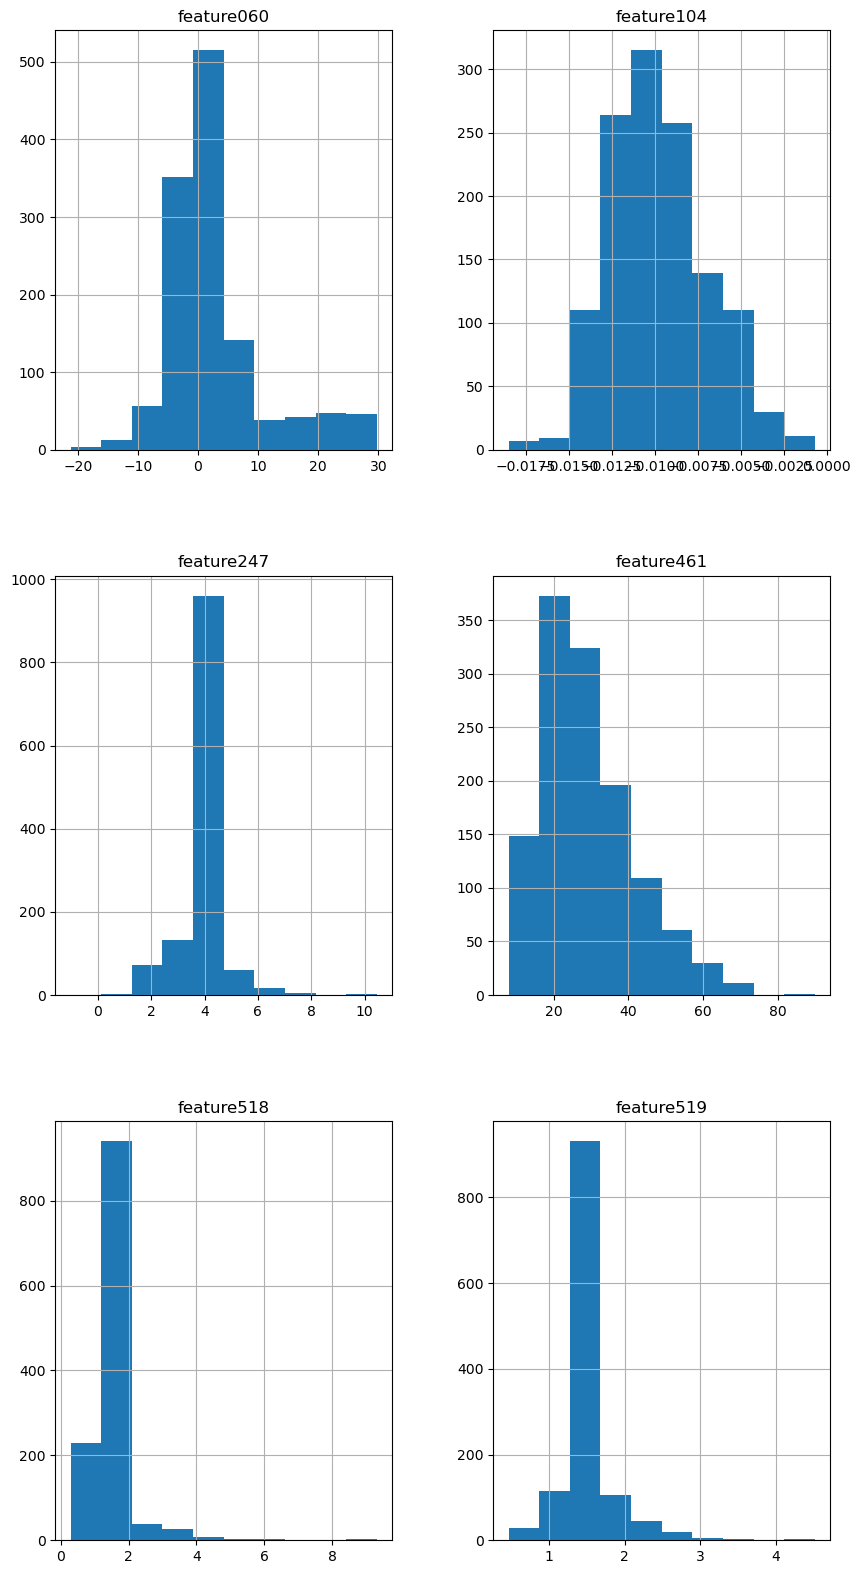

In [242]:
# Histogram of the features
X_train.hist(figsize=(10,20))

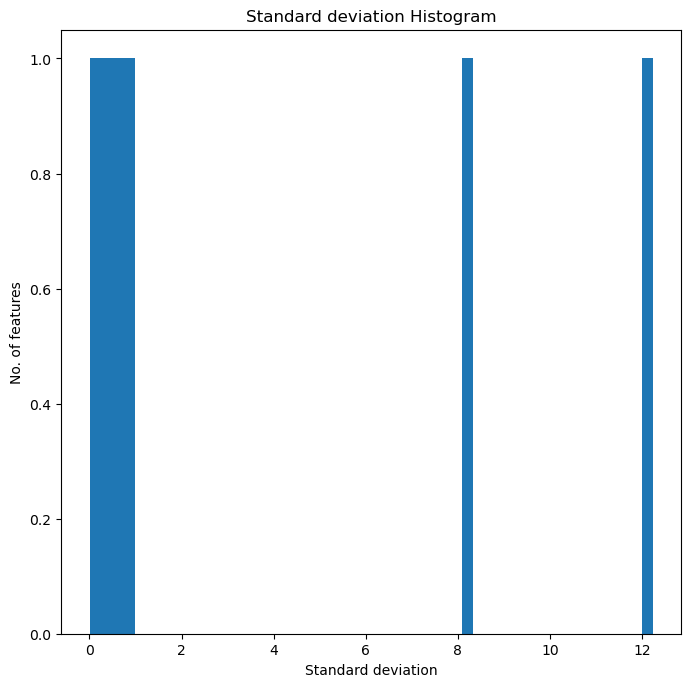

In [243]:
# Histogram of Standard Deviation of the remaining features
StandardDeviation(X_train)

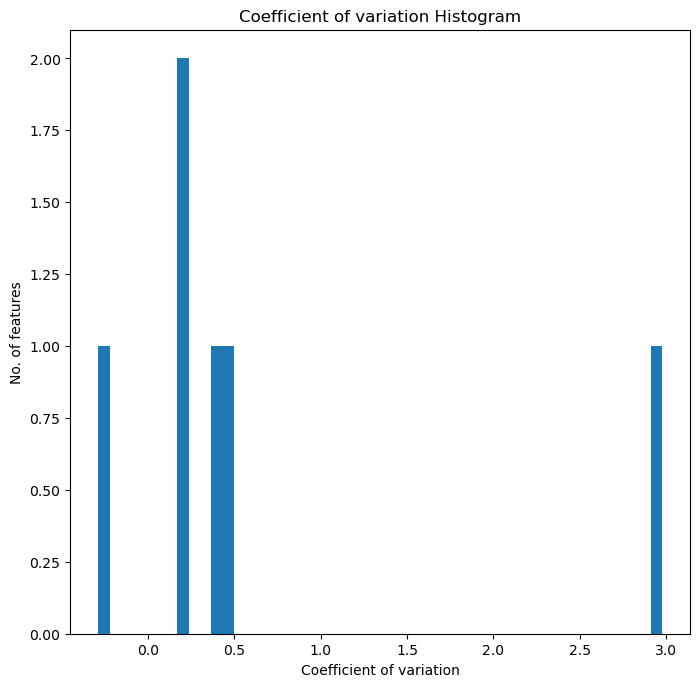

In [244]:
# Histogram of Coefficient of Standard Deviation of the remaining features
CoefficientOfVariation(X_train)

In [245]:
# Correlation of the remaining features

# Heatmap of correlation
corr = pd.DataFrame(X_train.corr())
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,feature060,feature104,feature247,feature461,feature518,feature519
feature060,1.00,0.35,0.05,0.07,0.02,0.05
feature104,0.35,1.00,0.03,0.03,-0.02,0.03
feature247,0.05,0.03,1.00,0.02,0.41,0.99
feature461,0.07,0.03,0.02,1.00,-0.04,0.02
feature518,0.02,-0.02,0.41,-0.04,1.00,0.41
feature519,0.05,0.03,0.99,0.02,0.41,1.00


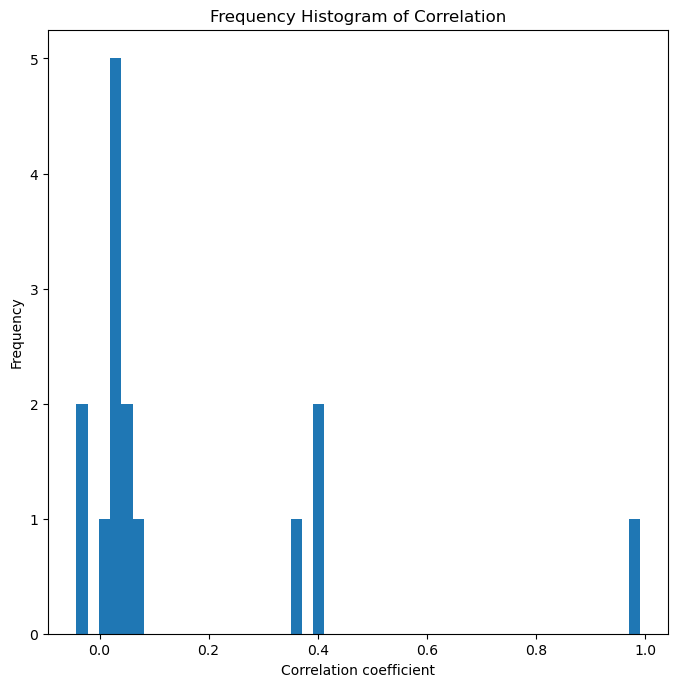

In [246]:
# Histogram of the Correlation of the remaining features
correlation(X_train)

## 5. Modeling

### 5.1 Balancing

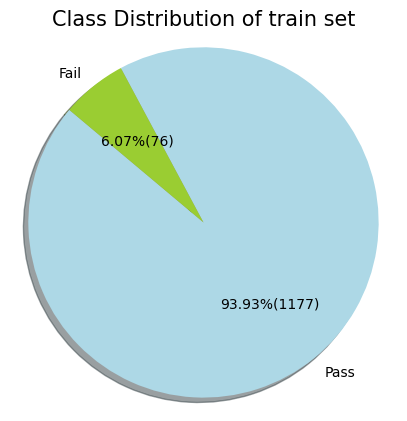

In [247]:
#Pie chart of the imbalanced train data
ClassDistributionGraph(y_train, 'Class Distribution of train set')

In [248]:
# Sampling technique

def Sampling(X_train, y_train, sampler):

    #SMOTE
    if sampler == 'SMOTE':
        sampler = SMOTE()    
    
    #ROSE
    if sampler == 'ROSE':
        sampler = RandomOverSampler(random_state=40)

    #ADASYN
    if sampler == 'ADASYN':
        sampler = ADASYN()
        
    #SMOTTEENN
    if sampler == 'SMOTEENN' :
        sampler = SMOTEENN(random_state=40)
        
    #SMOTETomek
    if sampler == 'SMOTETomek':
        from imblearn.combine import SMOTETomek 
        sampler = SMOTETomek(random_state=40)
        
    #BorderlineSMOTE
    if sampler == 'BorderlineSMOTE':
        from imblearn.over_sampling import BorderlineSMOTE 
        sampler = BorderlineSMOTE(random_state=40)
        
    if sampler =='ENN':
        from imblearn.under_sampling import EditedNearestNeighbours
        sampler = EditedNearestNeighbours()

    if sampler == 'Cluster':
        from imblearn.under_sampling import ClusterCentroids
        sampler= ClusterCentroids(random_state=40)
        
    if sampler == "randomunder":
        from imblearn.under_sampling import RandomUnderSampler
        sampler = RandomUnderSampler(random_state=40)
        
    if sampler == 'Instant' :
        from imblearn.under_sampling import InstanceHardnessThreshold
        X_train.index = X_train.index.astype(int)
        y_train.index = y_train.index.astype(int)
        sampler = InstanceHardnessThreshold(random_state=40, estimator=RandomForestClassifier())
        
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    counter = Counter(y_resampled)
    print(counter)
    return X_resampled, y_resampled

In [249]:
# Imbalance treatment
X_resampled, y_resampled = Sampling(X_train, y_train, 'SMOTEENN')

Counter({'FAIL': 860, 'PASS': 674})


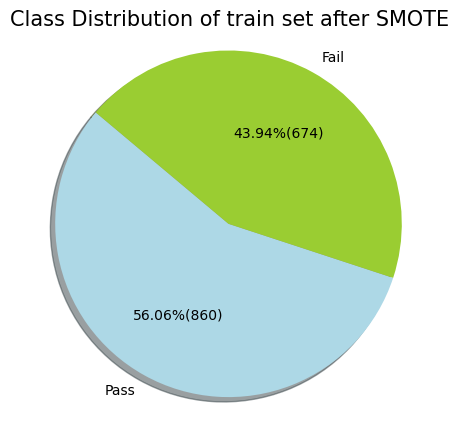

In [250]:
# Pie Chart to visualize balanced data
ClassDistributionGraph(y_resampled, 'Class Distribution of train set after SMOTE')

### 5.2 Preparing Test data

In [251]:
# Rough feature reduction
X_test = X_test.drop(columns = 'timestamp')
X_test = X_test.drop(columns = single_value_columns)
X_test = X_test.drop(columns = missing_value_cols)
X_test = X_test.drop(columns = features_least_volatile)

In [252]:
# Outlier treatment 
X_test = Outlier(X_test,'NaN')

Number of Outliers :  1478


In [253]:
# Missing Value imputation
X_test.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_test,'MICE'))

C:\Users\Behzad\anaconda3\envs\BP1\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [254]:
X_test.to_csv('X_test.CSV')
#X_test = pd.DataFrame(pd.read_csv("X_test.CSV"))
#X_test = X_test.set_index('ID')

In [255]:
# Feature selection 
X_test = X_test.filter(final_features)

In [256]:
# View processed test set
X_test

,feature060,feature104,feature247,feature461,feature518,feature519
ID,,,,,,
766.0,-0.2418,-0.0099,3.826420,18.7707,-0.675025,-1.640019
1231.0,4.6891,-0.0088,3.725286,53.9906,2.437357,0.226699
723.0,1.7618,-0.0101,3.891159,10.7413,-1.258709,0.952445
1470.0,0.0064,-0.0126,5.915200,37.5476,3.098377,2.502600
401.0,4.5027,-0.0057,3.982047,17.4238,-0.327800,0.730695
...,...,...,...,...,...,...
28.0,17.3873,-0.0078,3.579199,30.4356,-1.501326,1.066643
584.0,11.2909,-0.0111,3.076123,14.2373,2.183430,0.222916
953.0,0.4200,-0.0087,4.295400,29.9729,1.073900,1.854100


### 5.3 Grid search

### 5.4 Model Function

In [257]:
def run_ML_process(X, y, X_test, y_test, clf):
    #scaling
    #scaler = StandardScaler()
    #scaler.fit(X)
    #X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
    #X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    #Evaluation using Startified K Fold cross validation
    cv = StratifiedKFold(n_splits=10)
    scores = cross_val_score(clf, X, y, cv=cv, scoring = 'accuracy')
    print('Averace Accuracy:', scores.mean())

    #fit
    clf.fit(X, y)
    
    #predict
    y_pred_test = clf.predict(X_test)
    
    # View accuracy score
    print('Accuracy: ', accuracy_score(y_test, y_pred_test))
    
    #Plot confussion matrix
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_confusion_matrix(clf, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
    
    # View the classification report for test data and predictions
    print(classification_report(y_test, y_pred_test))
    
    
    #ROC curve
    
    #Prediction probabilities
    clf_probs = clf.predict_proba(X_test)
    
    #Probabilities of the positive outcome is kept
    clf_probs = clf_probs[:, 1]

    
    #Area under ROC curve
    clf_auc = roc_auc_score(y_test, clf_probs)
    print('Area under ROC: AUROC = %.3f' % (clf_auc))
    
    #Calculate ROC
    clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs, pos_label ='PASS')

    #Plot ROC curve
    plt.figure()
    plt.plot(clf_fpr, clf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % clf_auc)
    
    # Title
    
    plt.title('ROC Plot')
    # Axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Show legend
    plt.legend() # 
    # Show plot
    plt.show()

#### 5.4.1 Random Forest